### קריאת הקובץ סידור יצירת עמודות רלוונטיות

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def merge_csv_files(file_paths):
    
    dataframes = []

    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)


    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df


file_paths = [
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_1.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_2.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_3.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_4.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_5.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_6.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_7.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_8.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_9.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_10.csv'
]

df = merge_csv_files(file_paths)


In [2]:
## סידור של עמודת המוצא האתני כדי להבין לאיזה מוצא כל אות מייתחסת
descent_mapping = {
    'A': 'Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}
df['victim_descent'] = df['victim_descent'].map(descent_mapping)

## יצרית עמודה להבנה האם הפשע קרה בשעות הבוקר,צהריים,אחר הצהרים,ערב,לילה 
def categorize_time(datetime):
    hour = datetime.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
df['day_time'] = pd.to_datetime(df['date_occurred']).apply(categorize_time)



In [3]:
## יצרית עמודה האם הקורבן הוא ילד,נער מתבגר,מבוגר,זקן
def age_category(age):
        age = int(age)
        if age > 0 and age < 10:
            return "child"
        elif age >= 10 and age < 18:
            return "teenager"
        elif age >= 18 and age < 60:
            return "adult"
        elif age >= 60:
            return "old"
        else:    
            return "unknown"


df["age_description"] = df["victim_age"].apply(age_category)


In [4]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'


df['period_occurred'] = df['date_occurred'].dt.month.apply(get_season)


In [5]:
df['date_reported'] = pd.to_datetime(df['date_reported']).dt.date
df['date_occurred'] = pd.to_datetime(df['date_occurred']).dt.date
df['day_diff'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_occurred'])).dt.days



In [6]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])
df['day_of_week'] = df['date_occurred'].dt.day_name()

In [7]:
def classify_weapon(weapon_description):
    firearm_keywords = ['PISTOL', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'FIREARM', 'GUN', 'ASSAULT WEAPON', 'MAC', 'UZI', 'HECKLER & KOCH', 'EXPLOXIVE DEVICE', 'AUTOMATIC WEAPON', 'SEMI-AUTOMATIC', 'STARTER PISTOL', 'M1-1', 'M-14', 'BOMB', 'BOMB THREAT']
    sharp_keywords = ['KNIFE', 'SWORD', 'BLADE', 'SCISSORS', 'AXE', 'SCREWDRIVER', 'DIRK', 'DAGGER', 'CLEAVER', 'RAZOR', 'ICE PICK', 'BOWIE KNIFE', 'STRAIGHT RAZOR', 'OTHER CUTTING INSTRUMENT', 'UNKNOWN TYPE CUTTING INSTRUMENT']
    vehicle_keywords = ['VEHICLE']
    fire_bomb_keywords = ['FIRE', 'EXPLOXIVE DEVICE']
    threat_keywords = ['VERBAL THREAT', 'DEMAND NOTE', 'BOMB THREAT']
    improvised_keywords = ['ROCK', 'THROWN OBJECT', 'BLUNT INSTRUMENT', 'BOTTLE', 'CLUB', 'BAT', 'PIPE', 'STICK', 'HAMMER', 'GLASS', 'BRICK', 'BOARD', 'BELT', 'CHAIN', 'MARTIAL ARTS', 'CONCRETE BLOCK', 'SIMULATED GUN', 'MACE', 'PEPPER SPRAY', 'TOY GUN', 'SYRINGE', 'LIQUOR', 'DRUGS', 'FIXED OBJECT', 'BLACKJACK', 'RELIC FIREARM', 'AIR PISTOL', 'CAUSTIC CHEMICAL', 'POISON', 'BRASS KNUCKLES', 'TIRE IRON', 'DOG/ANIMAL (SIC ANIMAL ON)', 'SCALDING LIQUID', 'ROPE/LIGATURE', 'BOW AND ARROW']
    physical_keywords = ['STRONG-ARM', 'HANDS', 'FIST', 'FEET', 'BODILY FORCE', 'PHYSICAL PRESENCE']
    
    if pd.isna(weapon_description):
        return "no weapon used"
    
    if 'UNKNOWN WEAPON' in weapon_description or 'OTHER WEAPON' in weapon_description:
        return 'Unknown Weapon'
    if any(keyword in weapon_description for keyword in firearm_keywords):
        return 'firearm'
    elif any(keyword in weapon_description for keyword in sharp_keywords):
        return 'sharp weapon'
    elif any(keyword in weapon_description for keyword in vehicle_keywords):
        return 'vehicles'
    elif any(keyword in weapon_description for keyword in fire_bomb_keywords):
        return 'fire and bombs'
    elif any(keyword in weapon_description for keyword in threat_keywords):
        return 'threats'
    elif any(keyword in weapon_description for keyword in improvised_keywords):
        return 'improvised weapon'
    elif any(keyword in weapon_description for keyword in physical_keywords):
        return 'Physical strength'
    else:
        return 'OTHER'


df['weapon_category'] = df['weapon_description'].apply(classify_weapon)


### תרגום של העמודות

In [56]:
import pandas as pd


file_pt= r'C:\Users\Win10\Desktop\Columns_transltion.xlsx'


translating = pd.read_excel(file_pt)


last_three_columns = translating .iloc[:, -3:]


my_translation = last_three_columns.iloc[6:]

my_translation 

,Unnamed: 7,Unnamed: 8,Unnamed: 9
6,משתנה,תיאור,סוג
7,division_number,מספר המחלקה של אירוע הפשע.,int
8,date_reported,התאריך שבו דווח הפשע.,datetime64[ns]
9,date_occurred,התאריך שבו התרחש הפשע.,datetime64[ns]
10,area,קוד האזור שבו התרחש אירוע הפשע.,int
11,area_name,שם האזור שבו התרחש אירוע הפשע.,object
12,reporting_district,אזור הדיווח של אירוע הפשע.,int
13,part,מספר החלק של אירוע הפשע.,int
14,crime_code,קוד המתאים לסוג הפשע.,int
15,crime_description,תיאור הפשע.,object


### פיצול הקובץ לקטגוריות

In [43]:
violence_df = df[df['crime_description'].isin(['BATTERY - SIMPLE ASSAULT',
                                         'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
                                         'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
                                         'CRIMINAL THREATS - NO WEAPON DISPLAYED',
                                         'ARSON',
                                         'INTIMATE PARTNER - SIMPLE ASSAULT',
                                         'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
                                         'BRANDISH WEAPON',
                                         'OTHER ASSAULT',
                                         'SHOTS FIRED AT INHABITED DWELLING',
                                         'KIDNAPPING - GRAND ATTEMPT',
                                         'DISCHARGE FIREARMS/SHOTS FIRED',
                                         'KIDNAPPING',
                                         'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                                         'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
                                         'CRIMINAL HOMICIDE',
                                         'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
                                         'BATTERY ON A FIREFIGHTER',
                                         'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                                         'CRUELTY TO ANIMALS',
                                         'LYNCHING - ATTEMPTED',
                                         'MANSLAUGHTER, NEGLIGENT',
                                         'LYNCHING'])]
crime_list1 = [
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
    'THEFT PLAIN - PETTY ($950 & UNDER)',
    'ROBBERY',
    'BURGLARY',
    'VEHICLE - STOLEN',
    'BUNCO, GRAND THEFT',
    'THEFT OF IDENTITY',
    'BIKE - STOLEN',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT',
    'EXTORTION',
    'CHILD STEALING',
    'ATTEMPTED ROBBERY',
    'PURSE SNATCHING',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
    'BUNCO, PETTY THEFT',
    'BUNCO, ATTEMPT',
    'THEFT PLAIN - ATTEMPT',
    'SHOPLIFTING - ATTEMPT',
    'THEFT FROM PERSON - ATTEMPT',
    'VEHICLE - ATTEMPT STOLEN',
    'BURGLARY FROM VEHICLE, ATTEMPTED',
    'PICKPOCKET',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
    'COUNTERFEIT',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER)',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
    'DISHONEST EMPLOYEE - GRAND THEFT',
    'TILL TAP - PETTY ($950 & UNDER)',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
    'PETTY THEFT - AUTO REPAIR',
    'BOAT - STOLEN',
    'PURSE SNATCHING - ATTEMPT',
    'BIKE - ATTEMPTED STOLEN',
    'BRIBERY',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
    'GRAND THEFT / INSURANCE FRAUD',
    'DISHONEST EMPLOYEE - PETTY THEFT',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)',
    'GRAND THEFT / AUTO REPAIR',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT'
]

Thefts_and_frauds = df[df['crime_description'].isin(crime_list1)]

crime_list2 = [
    'RAPE, FORCIBLE',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
    'BATTERY WITH SEXUAL CONTACT',
    'LETTERS, LEWD - TELEPHONE CALLS, LEWD',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
    'SEXUAL PENETRATION W/FOREIGN OBJECT',
    'INDECENT EXPOSURE',
    'ORAL COPULATION',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
    'PIMPING',
    'RAPE, ATTEMPTED',
    'CHILD PORNOGRAPHY',
    'PEEPING TOM',
    'PANDERING',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)'
]


sex_crimes = df[df['crime_description'].isin(crime_list2)]



### בדיקת תקינות הנתונים

In [ ]:
missing_values_by_column = df.isnull().sum()


result_df = pd.DataFrame({
    'column name': missing_values_by_column.index,
    'Amount of missing values': missing_values_by_column.values
})
missing_values_by_column 

In [ ]:
## משהו שמאוד קורץ לעין זהשיש המון חסרים מעמודות של מין הקורבן ומוצאו אבל לא חסר כלום בעמודת הגיל

sns.boxplot(x='victim_age', data=df)
plt.title('Boxplot of Victim Age')
plt.xlabel('Victim Age')
plt.ylabel('Distribution')
plt.show() 

In [9]:
filtered_df = df[(df['victim_age'] == 0) & (df['victim_sex'].isna()) & (df['victim_descent'].isna())]


crime_counts = filtered_df['crime_description'].value_counts()

new_data = pd.DataFrame({'crime_description': crime_counts.index, 'frequency': crime_counts.values})
new_data.head(20)

,crime_description,frequency
0,VEHICLE - STOLEN,90980
1,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),17873
2,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",1763
3,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...",1020
4,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",330
5,BOAT - STOLEN,120
6,BURGLARY,74
7,BURGLARY FROM VEHICLE,48
8,THEFT PLAIN - PETTY ($950 & UNDER),41
9,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",40


In [10]:
filtered_data = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0)]
crime_description_counts = filtered_df['crime_description'].value_counts()

crime_description_counts


crime_description
VEHICLE - STOLEN                                            90980
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             17873
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   1763
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)     1020
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD      330
BOAT - STOLEN                                                 120
BURGLARY                                                       74
BURGLARY FROM VEHICLE                                          48
THEFT PLAIN - PETTY ($950 & UNDER)                             41
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)        40
THEFT OF IDENTITY                                              37
ROBBERY                                                        33
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                       28
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)            23
TRESPASSING                                               

In [11]:
filtered_data = df.loc[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] == 0), ['crime_description', 'victim_age']]
filtered_data

,crime_description,victim_age
33,VEHICLE - STOLEN,0
78,VEHICLE - STOLEN,0
104,VEHICLE - STOLEN,0
105,VEHICLE - STOLEN,0
135,VEHICLE - STOLEN,0
...,...,...
852889,VEHICLE - STOLEN,0
852900,VEHICLE - STOLEN,0
852916,VEHICLE - STOLEN,0
852926,VEHICLE - STOLEN,0


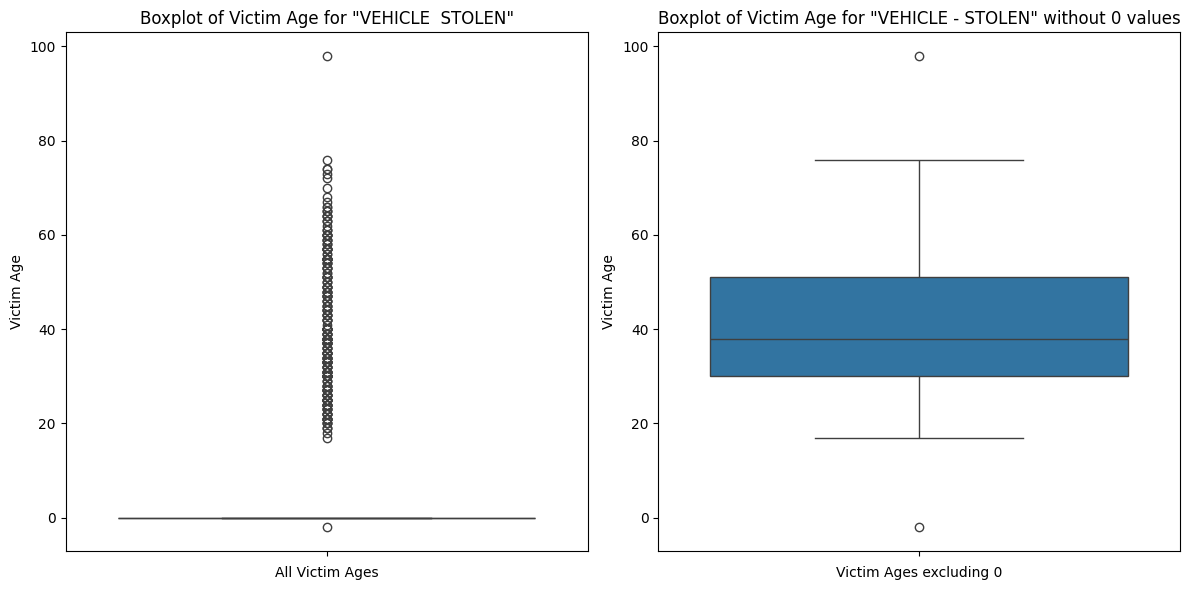

In [48]:
filtered_data_all = df[df['crime_description'] == 'VEHICLE - STOLEN']
filtered_data_no_0 = df[(df['crime_description'] == 'VEHICLE - STOLEN') & (df['victim_age'] != 0)]

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.boxplot(y='victim_age', data=filtered_data_all)
plt.title('Boxplot of Victim Age for "VEHICLE  STOLEN"')
plt.ylabel('Victim Age')
plt.xlabel('All Victim Ages')


plt.subplot(1, 2, 2)
sns.boxplot(y='victim_age', data=filtered_data_no_0)
plt.title('Boxplot of Victim Age for "VEHICLE - STOLEN" without 0 values')
plt.ylabel('Victim Age')
plt.xlabel('Victim Ages excluding 0')

plt.tight_layout()
plt.show()

In [30]:
#### אף על פי זה שאנו מבינים רוב המקרים שבהם הוזן הערך 0 אינם באמת תיקנות אלה ערכים חסרים לא נמהר
### להסיר אותם מהדאטה מכיוון שיש מצב שזה פשוט קורבנותש מעדיפים להישאר בעילום שם

###  ריצחות והריגות

In [78]:
homicide_data = df[df['crime_description'] == 'CRIMINAL HOMICIDE']


location_counts = homicide_data['premise_description'].value_counts().rest


,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,crime_code_3,crime_code_4,location,cross_street,latitude,longitude,day_time,age_description,period_occurred,day_dift
3194,200218817,2020-12-20,2020-12-20,2,Rampart,295,1,110,CRIMINAL HOMICIDE,1402 1407 1100 1822 0430 0906 1270 1816,...,NaN,NaN,1200 VENICE BL,NaN,34.0424,-118.2810,Noon,adult,Winter,0
3221,200416099,2020-12-19,2020-12-19,4,Hollenbeck,464,1,110,CRIMINAL HOMICIDE,1822 0430 0906,...,NaN,NaN,200 S SOTO ST,NaN,34.0445,-118.2116,Afternoon,adult,Winter,0
4603,200504437,2020-01-10,2020-01-10,5,Harbor,567,1,110,CRIMINAL HOMICIDE,0417 0411 1822 1218,...,NaN,NaN,800 S BEACON ST,NaN,33.7369,-118.2804,Night,adult,Winter,0
6085,200410989,2020-07-20,2020-07-20,4,Hollenbeck,499,1,110,CRIMINAL HOMICIDE,1100 0430 0906 1270 1822 1402 1419,...,NaN,NaN,BESWICK,CALZONA ST,34.0205,-118.1957,Night,adult,Summer,0
9256,201113525,2020-09-12,2020-09-12,11,Northeast,1137,1,110,CRIMINAL HOMICIDE,0913 1814 0400 0416 1402,...,NaN,NaN,600 N AVENUE 50,NaN,34.1109,-118.2016,Noon,adult,Fall,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849760,231220082,2023-09-23,2023-09-23,12,77th Street,1203,1,110,CRIMINAL HOMICIDE,1309 1100 1822 0430 0309 1407,...,NaN,NaN,1600 W 51ST ST,NaN,33.9969,-118.3068,Night,adult,Fall,0
850155,231609055,2023-06-10,2023-06-10,16,Foothill,1654,1,110,CRIMINAL HOMICIDE,0411 2004 1218,...,NaN,NaN,10300 NORRIS AV,NaN,34.2568,-118.4026,Noon,adult,Summer,0
850712,230611761,2023-06-26,2023-06-26,6,Hollywood,647,1,110,CRIMINAL HOMICIDE,1309 1402 0430 1100 1822 0906,...,NaN,NaN,6100 HOLLYWOOD BL,NaN,34.1017,-118.3224,Morning,adult,Summer,0
852717,231213579,2023-06-11,2023-06-11,12,77th Street,1233,1,110,CRIMINAL HOMICIDE,0853 1300 0430 1822 1402 1100,...,NaN,NaN,WESTERN AV,60TH ST,33.9859,-118.3090,Night,adult,Summer,0


### אלימות פיזית ילדים ונערים

In [141]:
relevant_crimes = [
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',"BATTERY - SIMPLE ASSAULT","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL",
    "OTHER ASSAULT"
    
    
]
Under_age_18_df = df[(df["age_description"] == "child") | (df["age_description"] == "teenager")]
Under_age_18_df = Under_age_18_df[Under_age_18_df['crime_description'].isin(relevant_crimes)]













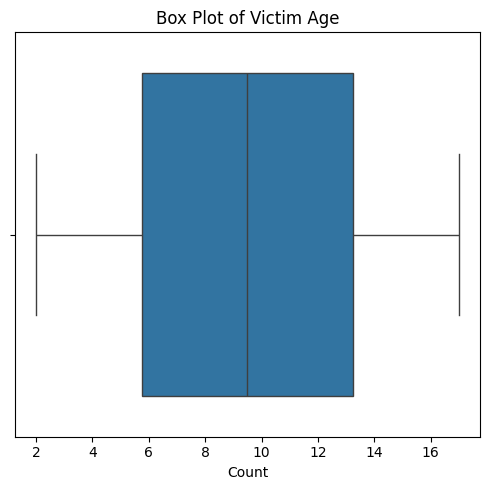

In [142]:
age_counts = Under_age_18_df['victim_age'].value_counts().reset_index()
age_counts.columns = ['victim_age', 'count']

fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(x='victim_age', data=age_counts, ax=ax)
ax.set_title('Box Plot of Victim Age')
ax.set_xlabel('Count')
plt.tight_layout()
plt.show()


In [143]:
child_df = Under_age_18_df[Under_age_18_df["age_description"] == "child"]
child_df_place_count = child_df['premise_description'].value_counts().reset_index()
child_df_place_count.columns = ["place_description", "amount"]



teenager_df = Under_age_18_df[Under_age_18_df["age_description"] == "teenager"]
teenager_df_place_count = teenager_df['premise_description'].value_counts().reset_index()
teenager_df_place_count.columns = ["place_description", "amount"]




C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\298112865.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_child_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_child_places['place_description']])
C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\298112865.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_teenager_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_teenager_places['place_description']])


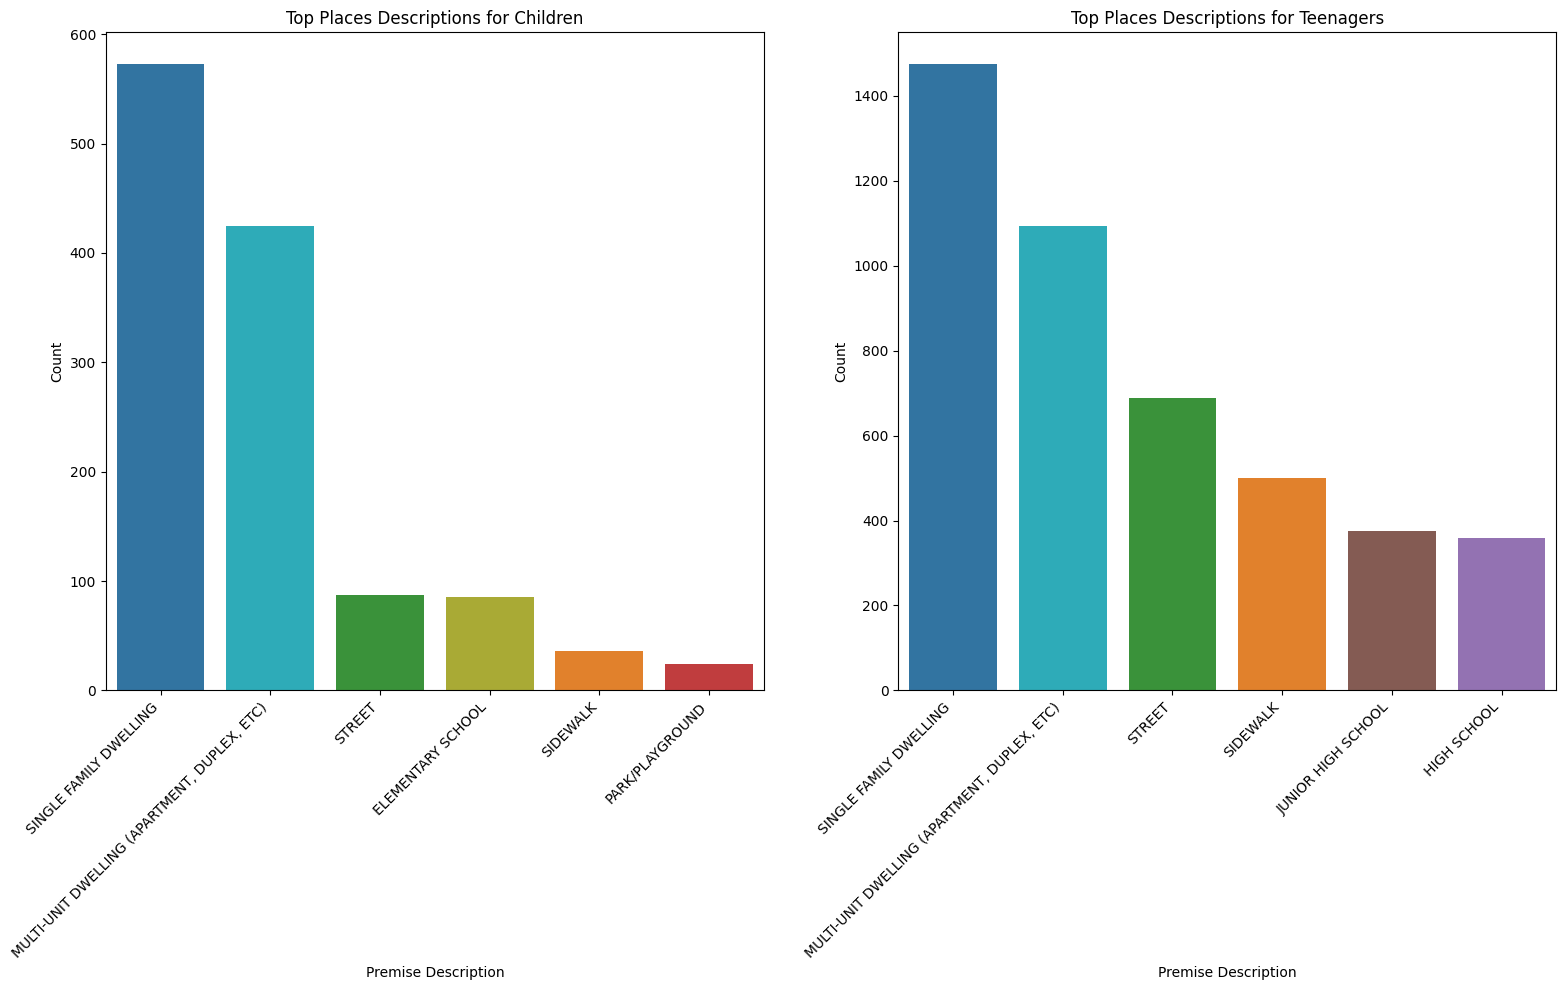

In [144]:
top_child_places = child_df_place_count.head(6)
top_teenager_places = teenager_df_place_count.head(6)


common_places = set(top_child_places['place_description']).intersection(set(top_teenager_places['place_description']))


custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf', '#bcbd22']  # כחול, כתום, ירוק, אדום, סגול, חום, טורקיז, צהוב ירקרק
unique_places = list(set(top_child_places['place_description']).union(set(top_teenager_places['place_description'])))
color_mapping = {place: custom_palette[i % len(custom_palette)] for i, place in enumerate(unique_places)}


plt.figure(figsize=(16, 10))

plt.subplot(1, 2, 1)
sns.barplot(data=top_child_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_child_places['place_description']])
plt.xticks(rotation=45, ha="right")
plt.title('Top Places Descriptions for Children')
plt.xlabel('Premise Description')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.barplot(data=top_teenager_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_teenager_places['place_description']])
plt.xticks(rotation=45, ha="right")
plt.title('Top Places Descriptions for Teenagers')
plt.xlabel('Premise Description')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

ניתן להבחין שכאשר מדובר על פשעי אלימות ופשעי מין,בשתי קבוצות הגילאים שבשתי המקומות הראשונים מופיעים מקומות מגורים

##### ניצור עמודה חדשה תגיד לנו הקורבנות היו בזמן ביצוע העבירה

In [145]:
residential_areas = [
    'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
    'GROUP HOME', 'OTHER RESIDENCE', 'YARD (RESIDENTIAL/BUSINESS)',
    'CONDOMINIUM/TOWNHOUSE', 'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME',
    'FOSTER HOME BOYS OR GIRLS*', 'PROJECT/TENEMENT/PUBLIC HOUSING', 'PORCH, RESIDENTIAL',
    'TRANSIENT ENCAMPMENT', 'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS'
]

schools = [
    'HIGH SCHOOL', 'JUNIOR HIGH SCHOOL', 'ELEMENTARY SCHOOL',
    'SPECIALTY SCHOOL/OTHER', 'PRIVATE SCHOOL/PRESCHOOL', 'DAY CARE/CHILDREN*',
    'BUS, SCHOOL, CHURCH', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 'DAY CARE/ADULTS*',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*', 'FRAT HOUSE/SORORITY/DORMITORY'
]

non_residential_non_schools = [
    'STREET', 'SIDEWALK', 'PARKING LOT', 'PARK/PLAYGROUND', 'OTHER BUSINESS', 'ALLEY',
    'RESTAURANT/FAST FOOD', 'OTHER PREMISE', 'VEHICLE, PASSENGER/TRUCK', 'MTA BUS',
    'SHOPPING MALL (COMMON AREA)', 'GAS STATION', 'BUS STOP', 'HOTEL', 'OTHER/OUTSIDE',
    'MARKET', 'MOTEL', 'LAUNDROMAT', 'THEATRE/MOVIE', 'MISSIONS/SHELTERS', 'BEACH',
    'GARAGE/CARPORT', 'DEPARTMENT STORE', 'OTHER STORE', 'HEALTH SPA/GYM',
    'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)', 'TRANSPORTATION FACILITY (AIRPORT)',
    'MINI-MART', 'HOSPITAL', 'PARKING UNDERGROUND/BUILDING', 'BUS-CHARTER/PRIVATE',
    'LIQUOR STORE', 'COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET\'S, ETC.)', 'CAR WASH',
    'MEDICAL/DENTAL OFFICES', 'DRUG STORE', 'OFFICE BUILDING/OFFICE', 'FREEWAY', 'LIBRARY',
    'SWAP MEET', 'ELEVATOR', 'PATIO*', 'SKATEBOARD FACILITY/SKATEBOARD PARK*', 'STAIRWELL*',
    'CONVENTION CENTER', 'MTA - RED LINE - HOLLYWOOD/WESTERN', 'MTA - RED LINE - HOLLYWOOD/VINE',
    'POLICE FACILITY', 'MTA PROPERTY OR PARKING LOT', 'BAR/COCKTAIL/NIGHTCLUB',
    'MTA - RED LINE - UNION STATION', 'MTA - RED LINE - UNIVERSAL CITY/STUDIO CITY',
    'MTA - EXPO LINE - EXPO PARK/USC', 'NURSING/CONVALESCENT/RETIREMENT HOME',
    'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)', 'SPORTS VENUE, OTHER',
    'MTA - BLUE LINE - 7TH AND METRO CENTER', 'DISCOUNT STORE (99 CENT,DOLLAR,ETC.)',
    'AUTO REPAIR SHOP', 'BEAUTY/BARBER SHOP', 'MTA - RED LINE - NORTH HOLLYWOOD',
    'JEWELRY STORE', 'BUS STOP/LAYOVER (ALSO QUERY 124)', 'MTA - RED LINE - 7TH AND METRO CENTER',
    'BALCONY*', 'MTA - BLUE LINE - 103RD/WATTS TOWERS', 'MTA - EXPO LINE - EXPO/BUNDY',
    'MTA - RED LINE - VERMONT/SANTA MONICA', 'CLOTHING STORE', 'CATERING/ICE CREAM TRUCK',
    'MTA - EXPO LINE - EXPO/VERMONT', 'MTA - ORANGE LINE - RESEDA',
    'LA UNION STATION (NOT LINE SPECIFIC)', 'DETENTION/JAIL FACILITY',
    'MTA - PURPLE LINE - WILSHIRE/VERMONT', 'MTA - BLUE LINE - GRAND/LATTC',
    'DRIVEWAY', 'APARTMENT/CONDO COMMON LAUNDRY ROOM', 'SLIPS/DOCK/MARINA/BOAT'
]


def categorize_premise(premise):
    if premise in residential_areas:
        return 'Residential Areas'
    elif premise in schools:
        return 'Schools'
    elif premise in non_residential_non_schools:
        return 'Non-Residential and Non-Schools'
    else:
        return 'Unknown'


Under_age_18_df['where_did_it_happen'] = Under_age_18_df['premise_description'].apply(categorize_premise)
### בנינו פונקציה שבודקת האם המקרה קרה מתחם מגורים למשל סוגרי דירות למינהם 

In [146]:
sorted_values = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
sorted_values.columns = ['where_did_it_happen', 'count']
sorted_values

,where_did_it_happen,count
0,Residential Areas,3806
1,Non-Residential and Non-Schools,2386
2,Schools,974
3,Unknown,43


C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\3068724214.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


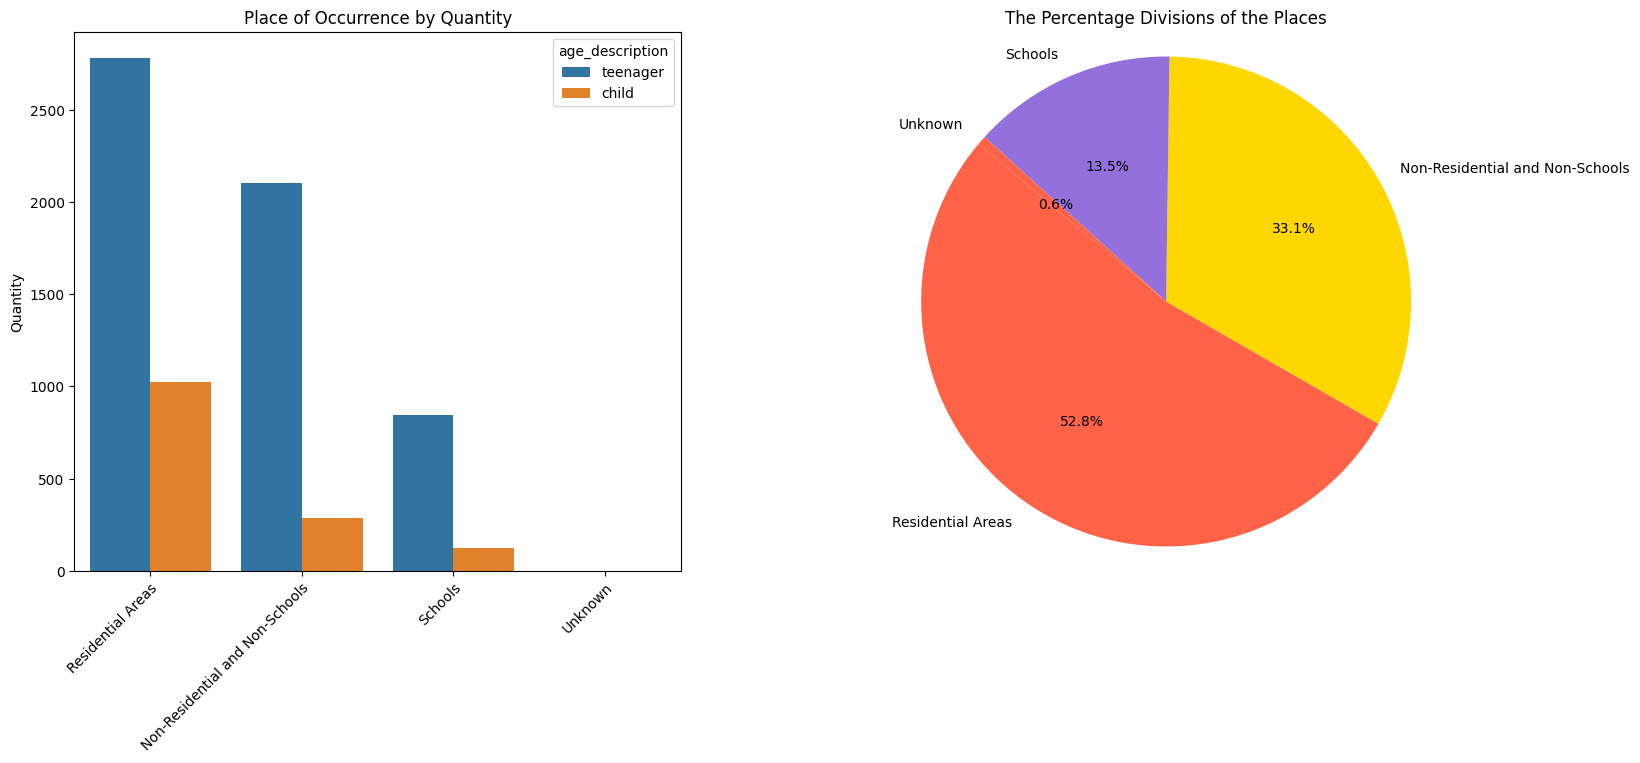

In [147]:
sorted_values = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
sorted_values.columns = ['where_did_it_happen', 'count']
Under_age_18_df_value_counts = sorted_values

fig, ax = plt.subplots(1, 2, figsize=(18, 7))


sns.countplot(data=Under_age_18_df[Under_age_18_df['where_did_it_happen'] != 'Unknown'], hue='age_description', x='where_did_it_happen', order=sorted_values['where_did_it_happen'], ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[0].set_title('Place of Occurrence by Quantity')
ax[0].set_xlabel('')
ax[0].set_ylabel('Quantity')


pie_data = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
pie_data.columns = ['where_did_it_happen', 'count']
colors = ['#FF6347', '#FFD700', '#9370DB']  # Matte red, yellow, and purple
ax[1].pie(pie_data['count'], labels=pie_data['where_did_it_happen'], autopct='%1.1f%%', startangle=140, colors=colors)
ax[1].set_title('The Percentage Divisions of the Places')
ax[1].axis('equal')


plt.subplots_adjust(wspace=0.3)
plt.show()

נתונים מדאיגים מצביעים על כך שגם עבור ילדים וגם עבור בני נוער המקומות שבהם הם הכי חשופים לאלימות הם דווקא בבית

In [148]:
all_population_df = df[df['crime_description'].isin(relevant_crimes)]
all_population_df['where_did_it_happen'] = all_population_df['premise_description'].apply(categorize_premise)

all_population_value_counts = all_population_df['where_did_it_happen'].value_counts().reset_index()
all_population_value_counts.columns = ['where_did_it_happen', 'count']
all_population_value_counts

C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\3409849938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_population_df['where_did_it_happen'] = all_population_df['premise_description'].apply(categorize_premise)


,where_did_it_happen,count
0,Non-Residential and Non-Schools,44174
1,Residential Areas,27489
2,Unknown,2713
3,Schools,1267


C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\3372319520.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=all_population_value_counts, x='where_did_it_happen', y='count', ax=ax[0], palette=all_population_value_counts['color'].tolist())
C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\3372319520.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\3372319520.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Under_age_18_df_value_counts, x='whe

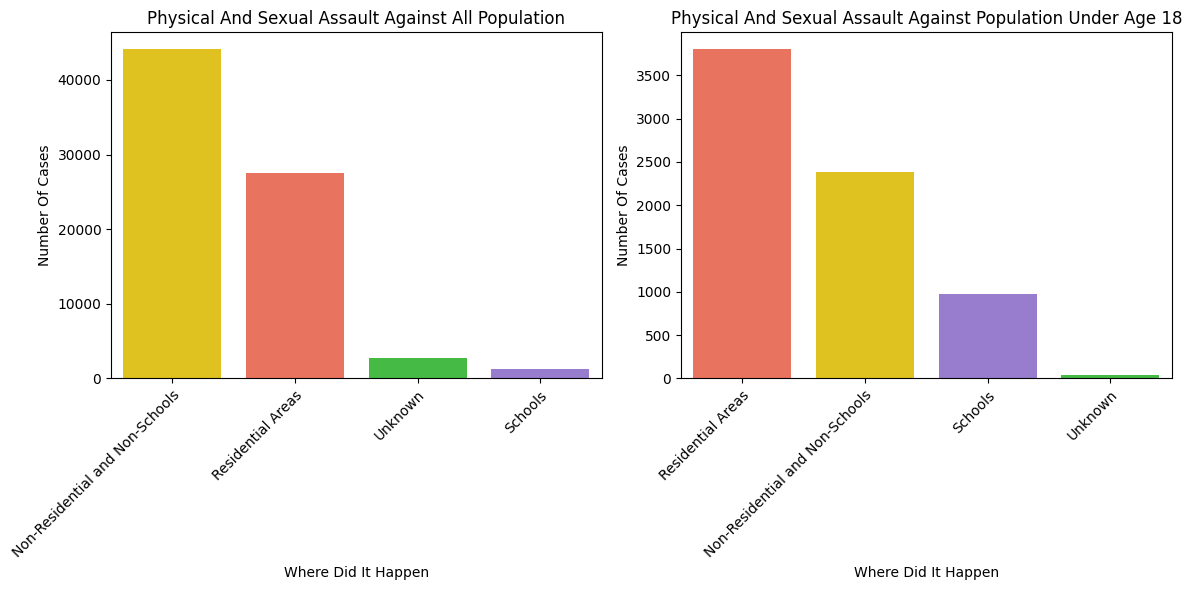

In [149]:
color_palette = {
    'Residential Areas': '#FF6347',  
    'Non-Residential and Non-Schools': '#FFD700',  
    'Schools': '#9370DB',  
    'Unknown': '#32CD32'  
}

all_population_value_counts['color'] = all_population_value_counts['where_did_it_happen'].map(color_palette)
sorted_values['color'] = Under_age_18_df_value_counts['where_did_it_happen'].map(color_palette)


fig, ax = plt.subplots(1, 2, figsize=(12,6))


sns.barplot(data=all_population_value_counts, x='where_did_it_happen', y='count', ax=ax[0], palette=all_population_value_counts['color'].tolist())
ax[0].set_title('Physical And Sexual Assault Against All Population')
ax[0].set_xlabel('Where Did It Happen')
ax[0].set_ylabel('Number Of Cases')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


sns.barplot(data=Under_age_18_df_value_counts, x='where_did_it_happen', y='count', ax=ax[1], palette=sorted_values['color'].tolist())
ax[1].set_title('Physical And Sexual Assault Against Population Under Age 18')
ax[1].set_xlabel('Where Did It Happen')
ax[1].set_ylabel('Number Of Cases')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()

נשים לב שאנו מסתכלים על גרף של כלל האוכלוסייה בשונה מילדים ונערים המקומות המובלים שבהם נעשים פשעי אךימות פיזית או מינית הם לא מקומות מגורים

C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\4210236078.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
C:\Users\Win10\AppData\Local\Temp\ipykernel_12160\4210236078.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')


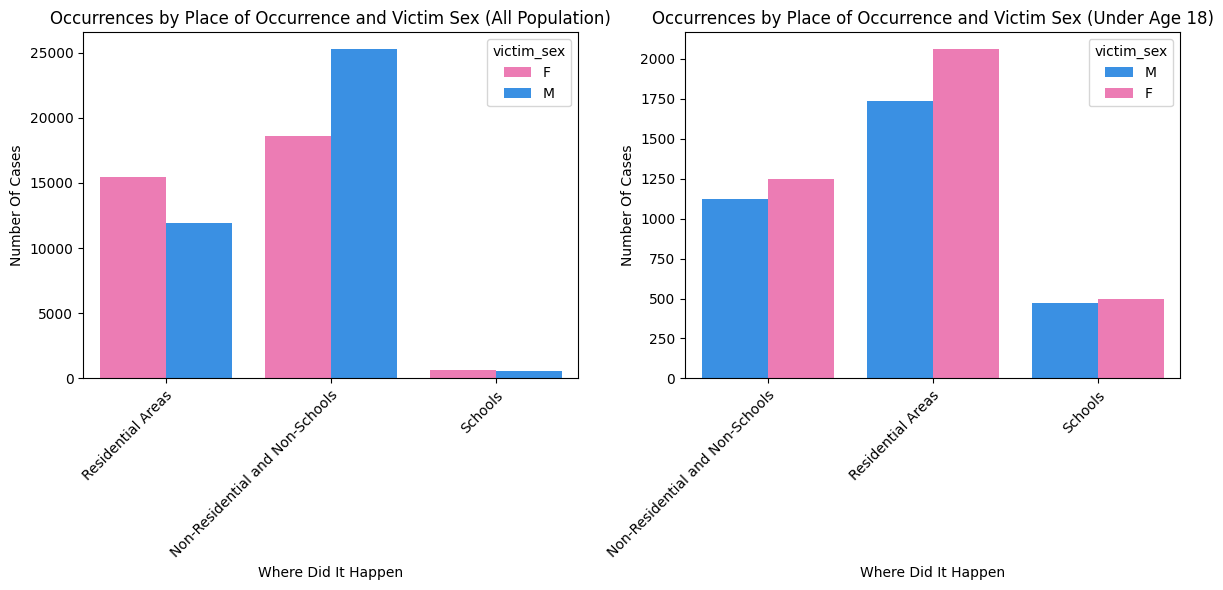

In [150]:
area_where_counts_all_population = all_population_df.groupby(['where_did_it_happen', 'victim_sex']).size().reset_index(name='count')
area_where_counts = Under_age_18_df.groupby(['where_did_it_happen', 'victim_sex']).size().reset_index(name='count')
filtered_all_population_df = all_population_df[all_population_df['victim_sex'].isin(['F', 'M']) & (all_population_df['where_did_it_happen'] != 'Unknown')]
filtered_under_age_18_df = Under_age_18_df[Under_age_18_df['victim_sex'].isin(['F', 'M']) & (Under_age_18_df['where_did_it_happen'] != 'Unknown')]


fig, ax = plt.subplots(1, 2, figsize=(12,6))


colors = {'F': '#FF69B4', 'M': '#1E90FF'}  


sns.countplot(data=filtered_all_population_df, hue='victim_sex', x='where_did_it_happen', ax=ax[0], palette=colors)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[0].set_title('Occurrences by Place of Occurrence and Victim Sex (All Population)')
ax[0].set_xlabel('Where Did It Happen')
ax[0].set_ylabel('Number Of Cases')


sns.countplot(data=filtered_under_age_18_df, hue='victim_sex', x='where_did_it_happen', ax=ax[1], palette=colors)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax[1].set_title('Occurrences by Place of Occurrence and Victim Sex (Under Age 18)')
ax[1].set_xlabel('Where Did It Happen')
ax[1].set_ylabel('Number Of Cases')

plt.tight_layout()
plt.show()


ניצן לראות בפגיעות פיזיות  אצל כלל האוכלוסייה,גברים נוטים להיפגע יותר מחוץ למתחמי מגורים ואילו נשים נפגעות יותר במתחמי מגורים. וכאשר מסתכלים על ילדים ונערים בנושא זה הנשים נפגעות יותר בכל המקומות

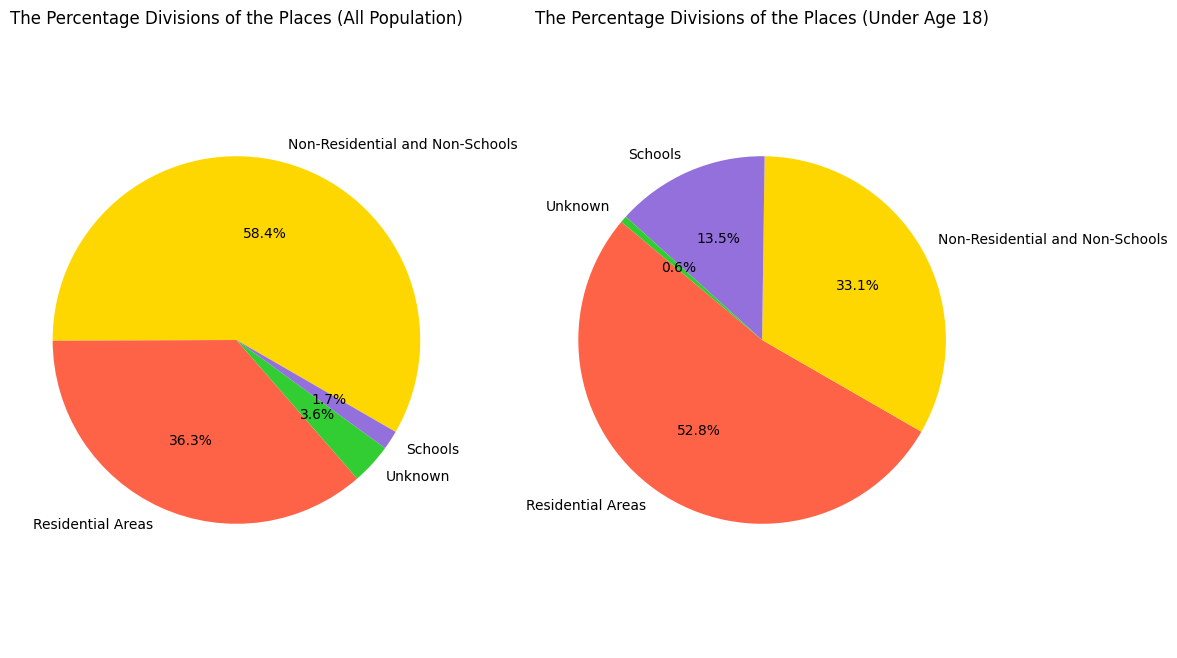

In [151]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))


colors = [color_palette[label] for label in all_population_value_counts['where_did_it_happen']]


ax[0].pie(all_population_value_counts['count'], labels=all_population_value_counts['where_did_it_happen'], autopct='%1.1f%%', startangle=-30, colors=colors)
ax[0].set_title('The Percentage Divisions of the Places (All Population)')
ax[0].axis('equal')


colors = [color_palette[label] for label in sorted_values['where_did_it_happen']]


ax[1].pie(Under_age_18_df_value_counts['count'], labels=sorted_values['where_did_it_happen'], autopct='%1.1f%%', startangle=140, colors=colors)
ax[1].set_title('The Percentage Divisions of the Places (Under Age 18)')
ax[1].axis('equal')

plt.subplots_adjust(wspace=0.3)
plt.show()

##### מסקנה 1 
ניתן לראות את השוני בין המקרים כאשר מודברת על פגיעות פיזיות,ומיניות כאשר מדובר על כלל האוכלוסייה אחוז המקרים שקרו במתחמי מגורים הוא 36.3,כאשר מדובר על ילדים ונערים אחוז המקרים שקרו במתחמי מגורים  הוא 52.8 אחוז. העובדה הזו עלולה להצביע על מגמה מדאיגה של אלימות במשפחה


### פשעים לפי איזורים

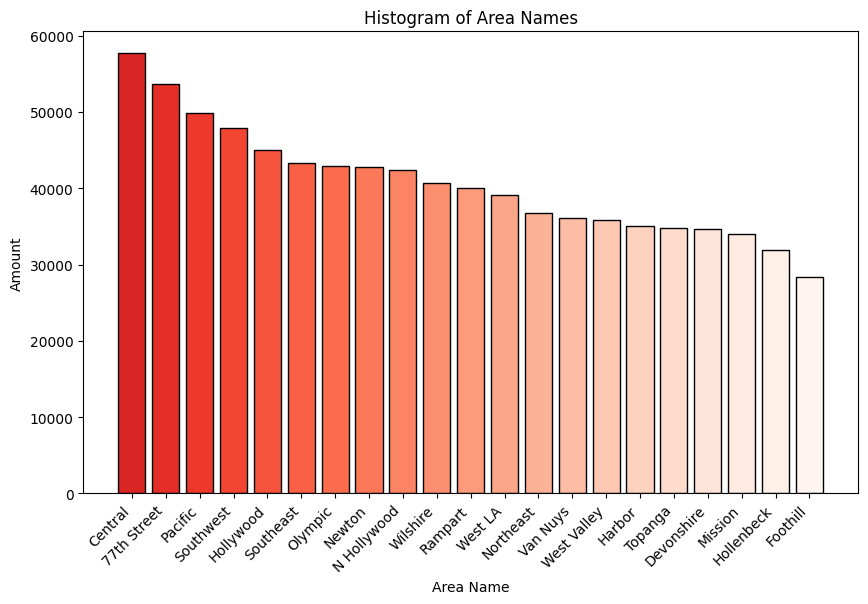

In [36]:
area_df =  df['area_name'].value_counts().reset_index()
area_df.columns = ['area_name', 'amount']

plt.figure(figsize=(10, 6))
plt.bar(area_df['area_name'], area_df['amount'], color=plt.cm.Reds_r(np.linspace(0.3, 1, len(area_df))), edgecolor='black')
plt.title('Histogram of Area Names')
plt.xlabel('Area Name')
plt.ylabel('Amount')
plt.xticks(rotation=45,ha="right")
plt.show()


### גנבי זהות בהולנבק

In [7]:
identity_theft = df[df["crime_description"] == "THEFT OF IDENTITY"]
len(identity_theft)
### 53467 
### מקרים של גניבת זהות איפה חיים אתגר בחישוב זריז מעל48 מקרים בממוצע ליום בשלוש שנים זה כבר בעיה 
### נחקוראת העניין 


53467

#### נעיף מבט על התפלגות הגילאים של הקורבנות

C:\Users\Win10\AppData\Local\Temp\ipykernel_2160\1974408678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=identity_theft, x='victim_age', palette='pastel')


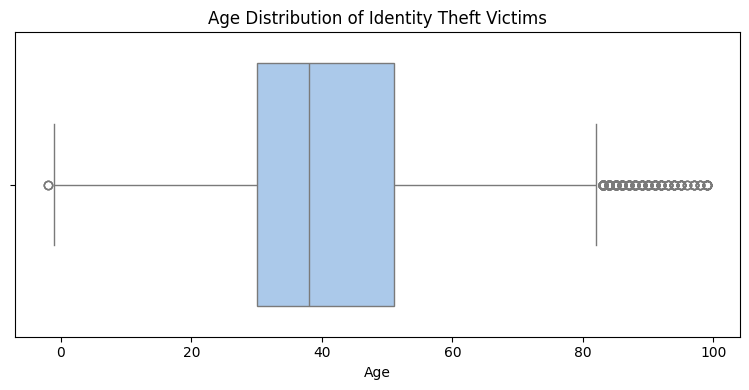

In [15]:
plt.figure(figsize=(15,4))


plt.subplot(1, 2, 1)
sns.boxplot(data=identity_theft, x='victim_age', palette='pastel')
plt.title('Age Distribution of Identity Theft Victims')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [17]:
identity_theft_age0 = identity_theft[identity_theft['victim_age'] <= 0]
len(identity_theft_age0)


992

קיימים כ992 ערכים שהגיל שלהם הוא קטן או שווה ל 0 נבחר להשאיר אותם מכיוון שסביר שהמתלוננים בחרו להישאר בעילום שם או טעות בהקלדת הנתונים נבחר להשאירים כדי הם עדיין מקרים שקרו 

#### נבחן את אזורי הפשיעה הבהם נעשים פשעי גניבת הזהות

In [53]:
idt_by_area = identity_theft['area_name'].value_counts().reset_index()
idt_by_area.columns = ["area_name","amount"]
idt_by_area


,area_name,amount
0,77th Street,3849
1,Southeast,3431
2,Southwest,3323
3,Devonshire,2926
4,West LA,2902
5,Topanga,2826
6,N Hollywood,2820
7,West Valley,2797
8,Van Nuys,2780
9,Mission,2675


#### נבחן את המקומות הבהם נעשים פשעי גניבת הזהות

In [59]:
place_counts = identity_theft['premise_description'].value_counts().reset_index()
place_counts.columns = ['place', 'count']
place_counts.head(10)



,place,count
0,SINGLE FAMILY DWELLING,26250
1,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",12915
2,BANK,2452
3,AUTOMATED TELLER MACHINE (ATM),2205
4,CYBERSPACE,1592
...,...,...
154,WATER FACILITY,1
155,MORTUARY,1
156,SWAP MEET,1
157,SLIPS/DOCK/MARINA/BOAT,1


#### נבדוק מה הם האיזורים שעושים שימוש במקומות שמתעסקים בכסף כדי לגנוב את זהות הקורבנות

In [63]:
selected_premises = [
    "BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK",
    "DRIVE THRU BANKING (WINDOW)",
    "BANKING INSIDE MARKET-STORE",
    "CHECK CASHING",
    "SAVINGS & LOAN",
    "FINANCE COMPANY",
    "CREDIT UNION",
    "AUTOMATED TELLER MACHINE (ATM)",
    "BANK"
]



idt= identity_theft[identity_theft['premise_description'].isin(selected_premises)]
idt_area_name.columns = ['area_name', 'amount']
idt_area_name


,area_name,amount
0,Hollenbeck,541
1,N Hollywood,496
2,Van Nuys,409
3,Devonshire,334
4,Rampart,332
5,Harbor,316
6,Northeast,299
7,Pacific,251
8,Foothill,233
9,Newton,231


###### נתון מפתיע הולנבק האזור שנמצא במקומות האחרונים (שלישי לפני הסוף) נמצא במקום הראשון שמדובר על פשעים שנעשו במקומות שמתעסקים בכסף

#### ננסה להבין מי האוכלוסייה שסובלת הכי הרבה מגנבי זהות במקומות שעיקר התעסוקתם זה כסף בהולנבק

In [68]:
idt_Hollenbeck = identity_theft[(identity_theft['premise_description'].isin(selected_premises)) & (identity_theft['area_name'] == 'Hollenbeck')]


idt_Hollenbeck_by_descent = idt_Hollenbeck['victim_descent'].value_counts().reset_index()
idt_Hollenbeck_by_descent.columns = ['victim_descent', 'amount']
idt_Hollenbeck_by_descent

,victim_descent,amount
0,Hispanic,406
1,Black,48
2,White,40
3,Unknown,17
4,Other,10
5,Chinese,6
6,Filipino,4
7,Asian,3
8,Pacific Islander,2
9,Vietnamese,2


##### ניתן לראות שבפער ניקר ההיספנים המסכנים סובלים הכי הרבה מהגניבות זהות במקמות  שעיקר התעסקותם זה כסף

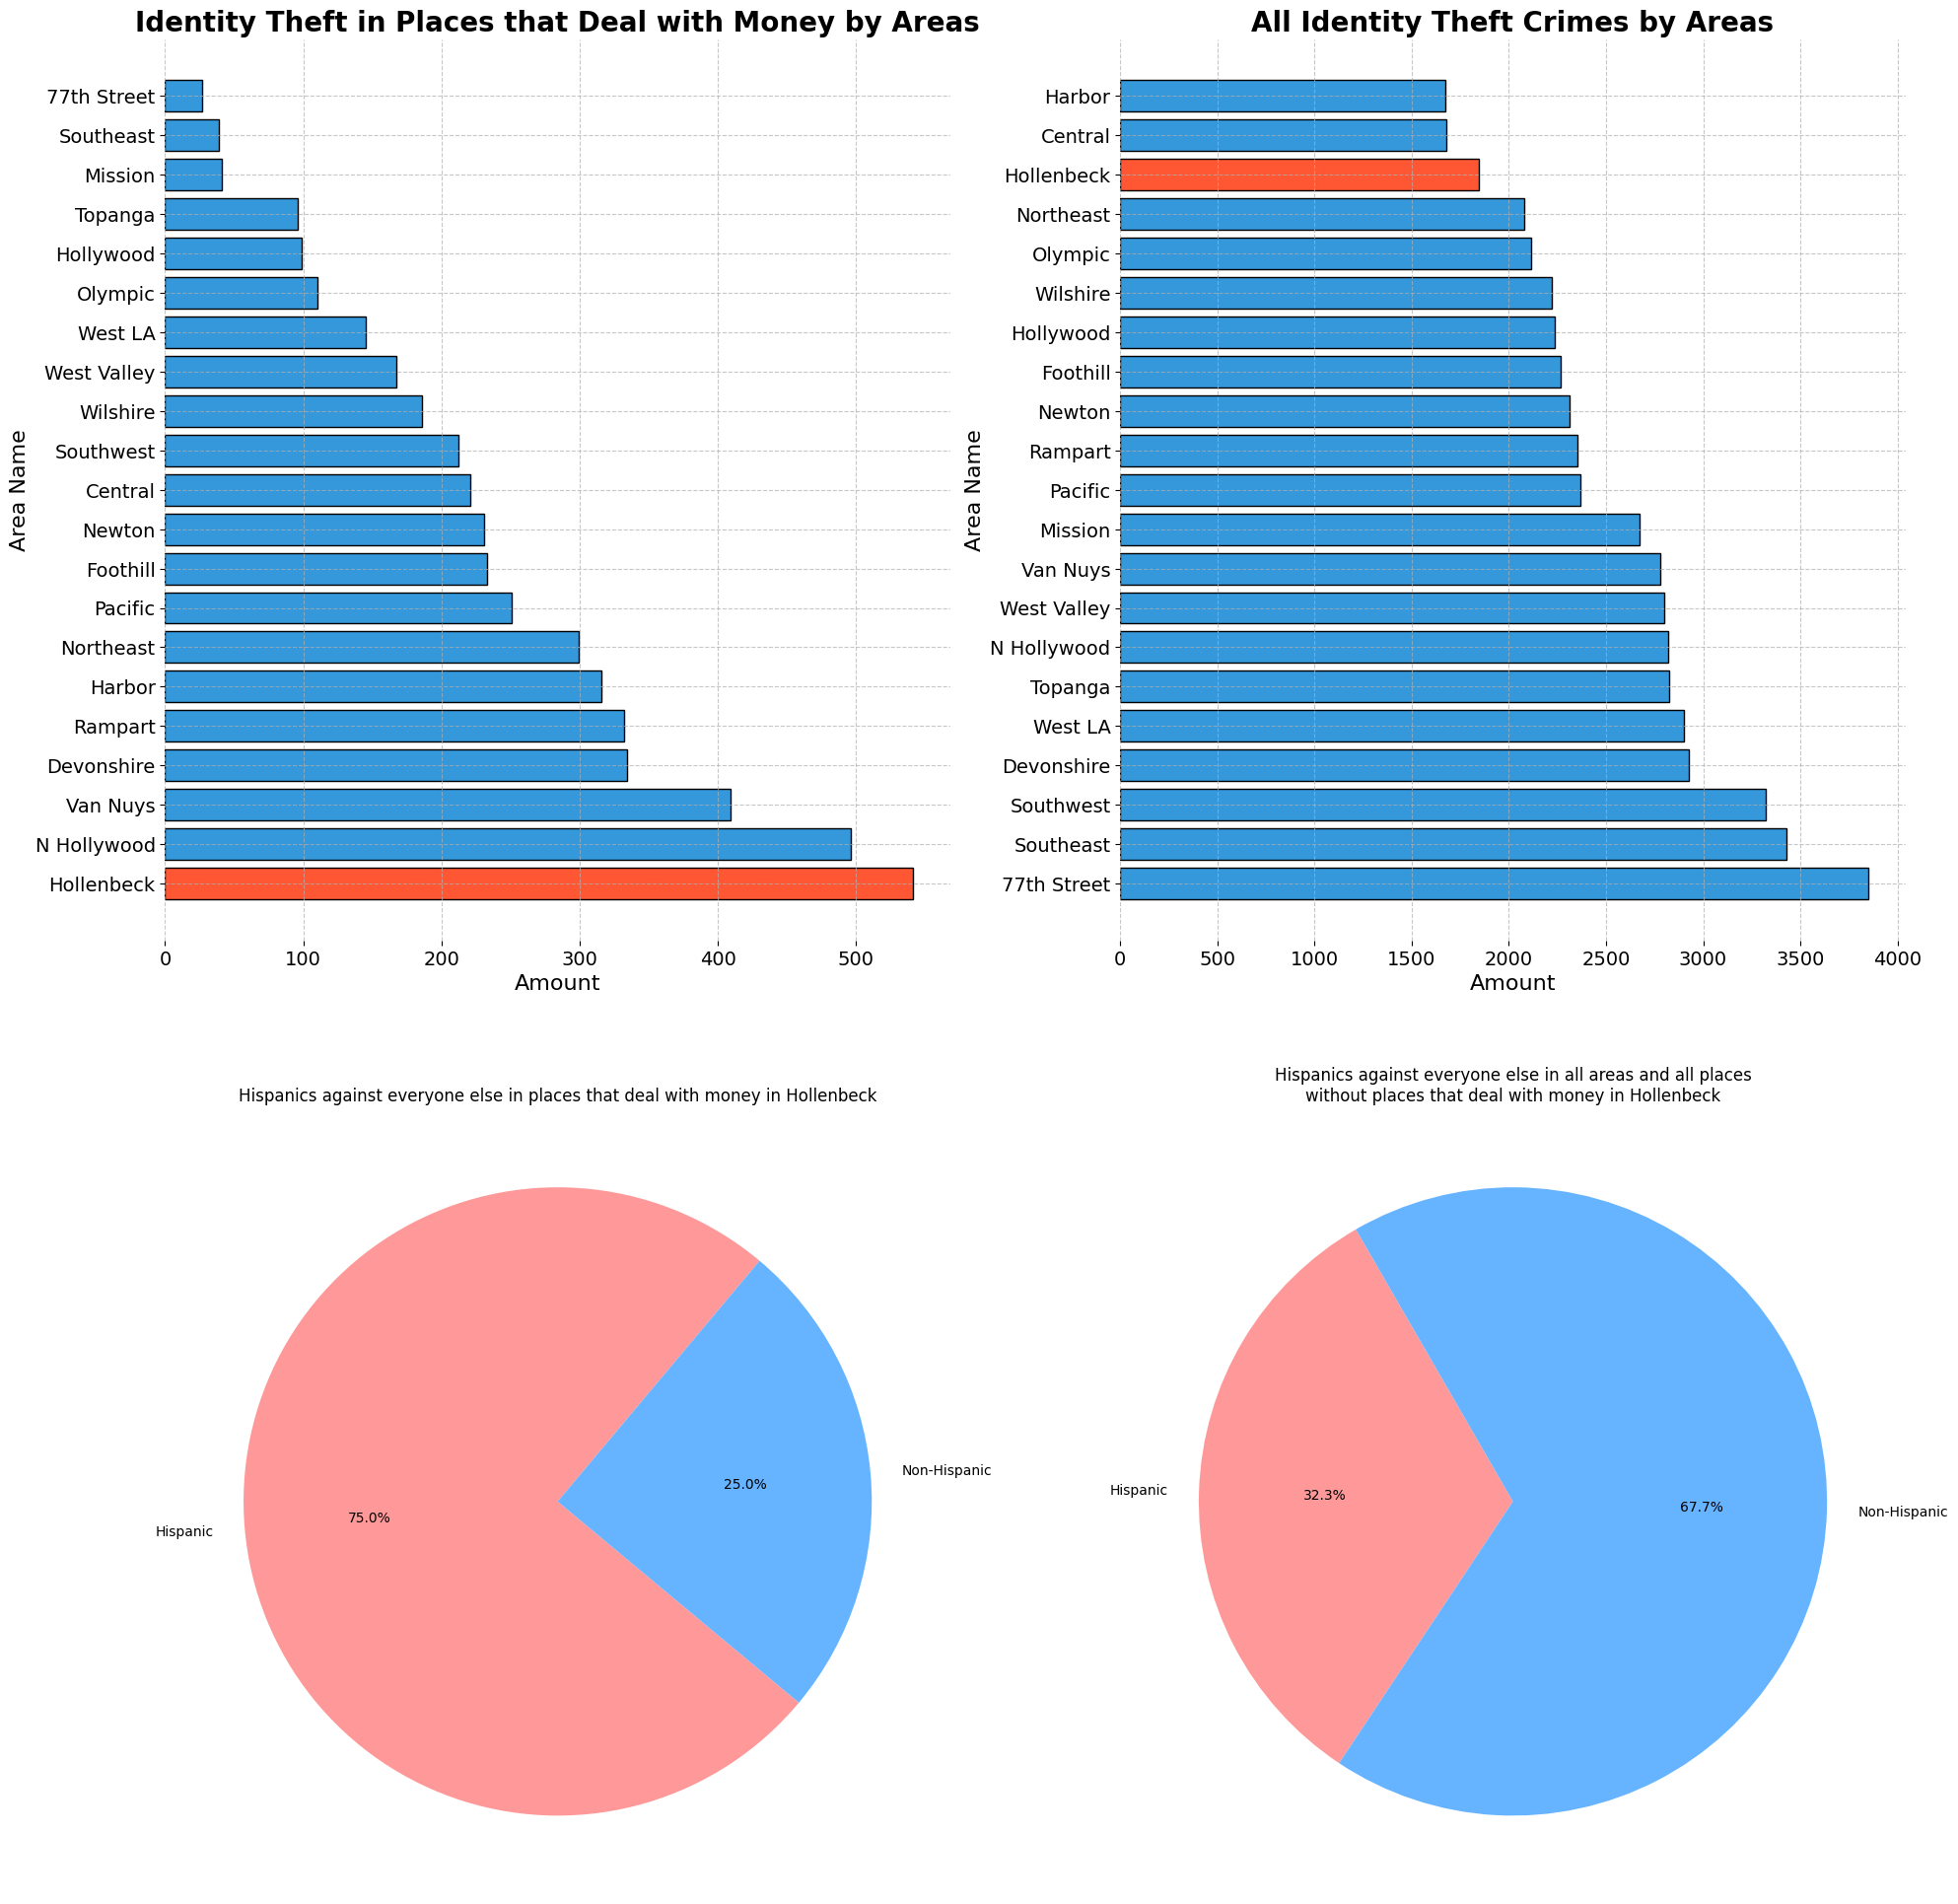

In [83]:

idt_Hollenbeck_by_descent['descent_category'] = idt_Hollenbeck_by_descent['victim_descent'].apply(lambda x: 'Hispanic' if x == 'Hispanic' else 'Non-Hispanic')


descent_summary = idt_Hollenbeck_by_descent.groupby('descent_category')['amount'].sum()
descent_summary_percentage = (descent_summary / descent_summary.sum()) * 100


idt_by_victim_descent = identity_theft[~(
    (identity_theft['victim_descent'] == 'Hispanic') & 
    (identity_theft['area_name'] == 'Hollenbeck') & 
    (identity_theft['premise_description'].isin(selected_premises))
)]

idt_by_victim_descent = idt_by_victim_descent['victim_descent'].value_counts().reset_index()
idt_by_victim_descent.columns = ["victim_descent", "amount"]
idt_by_victim_descent['descent_category'] = idt_by_victim_descent['victim_descent'].apply(lambda x: 'Hispanic' if x == 'Hispanic' else 'Non-Hispanic')
idt_by_victim_summary = idt_by_victim_descent.groupby('descent_category')['amount'].sum()
idt_by_victim_summary_percentage = (idt_by_victim_summary / idt_by_victim_summary.sum()) * 100


fig, axs = plt.subplots(2, 2, figsize=(20, 20))


axs[0, 0].barh(idt_area_name['area_name'], idt_area_name['amount'], color=set_colors(idt_area_name), edgecolor='black')
axs[0, 0].set_title('Identity Theft in Places that Deal with Money by Areas', fontsize=20, weight='bold')
axs[0, 0].set_xlabel('Amount', fontsize=16)
axs[0, 0].set_ylabel('Area Name', fontsize=16)
axs[0, 0].tick_params(axis='x', labelsize=14)
axs[0, 0].tick_params(axis='y', labelsize=14)


axs[0, 1].barh(idt_by_area['area_name'], idt_by_area['amount'], color=set_colors(idt_by_area), edgecolor='black')
axs[0, 1].set_title('All Identity Theft Crimes by Areas', fontsize=20, weight='bold')
axs[0, 1].set_xlabel('Amount', fontsize=16)
axs[0, 1].set_ylabel('Area Name', fontsize=16)
axs[0, 1].tick_params(axis='x', labelsize=14)
axs[0, 1].tick_params(axis='y', labelsize=14)


axs[1, 0].pie(descent_summary_percentage, labels=descent_summary_percentage.index, autopct='%1.1f%%', startangle=50, colors=['#ff9999','#66b3ff'])
axs[1, 0].set_title('Hispanics against everyone else in places that deal with money in Hollenbeck')


axs[1, 1].pie(idt_by_victim_summary_percentage, labels=idt_by_victim_summary_percentage.index, autopct='%1.1f%%', startangle=120, colors=['#ff9999','#66b3ff'])
axs[1, 1].set_title('Hispanics against everyone else in all areas and all places\nwithout places that deal with money in Hollenbeck')

for ax in axs.flat:
    ax.grid(True, linestyle='--', alpha=0.7)
    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

#### מסקנה 2

ניתן להבחין כי כאשר מדובר על פשעי גניבות הזהות באופן כללי האיזור הולנבק נמצא בין האיזורים שבהם כמות פשעי גניבות הזהות מהנמוכים ביותר
אך כאשר אנו מסתכלים על פשעי גניבות הזהות שנעשים במקומות ציבוריים שעיקר התעסקותם זה כסף (בנקים,כספומטים,חברות,אשראי וכו), הולנבק במקום הראשון
מבדיקה קצרה בגוגל, גילנו שבהולנבק שיעור העוני מהגבוהים בארצות הברית, כ33 אחוז נמאים מתחת לקו העוני וגם שההיספנים מהווים כ65 אחוז מכלל העניים בארצות הברית.
נתונים אלו יכולים להסביר את המגמת גניבות הזהות שאנו רואים במקומות ציבוריים שעיקר עיסוקיים זה כסף בהולנבק ,ההנחה שלנו היא שההיספנים שנמצאים שם מהווים "טרף קל"
לגנבי זהות עכב העובדה שרובם עניים קל יותר לפתה אותם למסור פרטיים אישים במקומות כמו בנקים כספומטים וגרומים אחרים שמתעסקים בכסף 

### פריצות לנכנסים של האוכלוסייה המבוגרת 

In [8]:
old_df = df[df["age_description"]== "old"]

old_df_crime_description = old_df['crime_description'].value_counts().reset_index()
old_df_crime_description.columns = ['crime_description', 'count']

old_df_crime_description.head(20)


,crime_description,count
0,BATTERY - SIMPLE ASSAULT,9901
1,BURGLARY,8426
2,THEFT OF IDENTITY,7226
3,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",5190
4,THEFT PLAIN - PETTY ($950 & UNDER),5010
5,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,4778
6,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",4681
7,BURGLARY FROM VEHICLE,4323
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",3131
9,VANDALISM - MISDEAMEANOR ($399 OR UNDER),2983


C:\Users\Win10\AppData\Local\Temp\ipykernel_8252\807225261.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='premise_description', y='count', data=top_10_premise_descriptions, palette=colors, edgecolor='black')


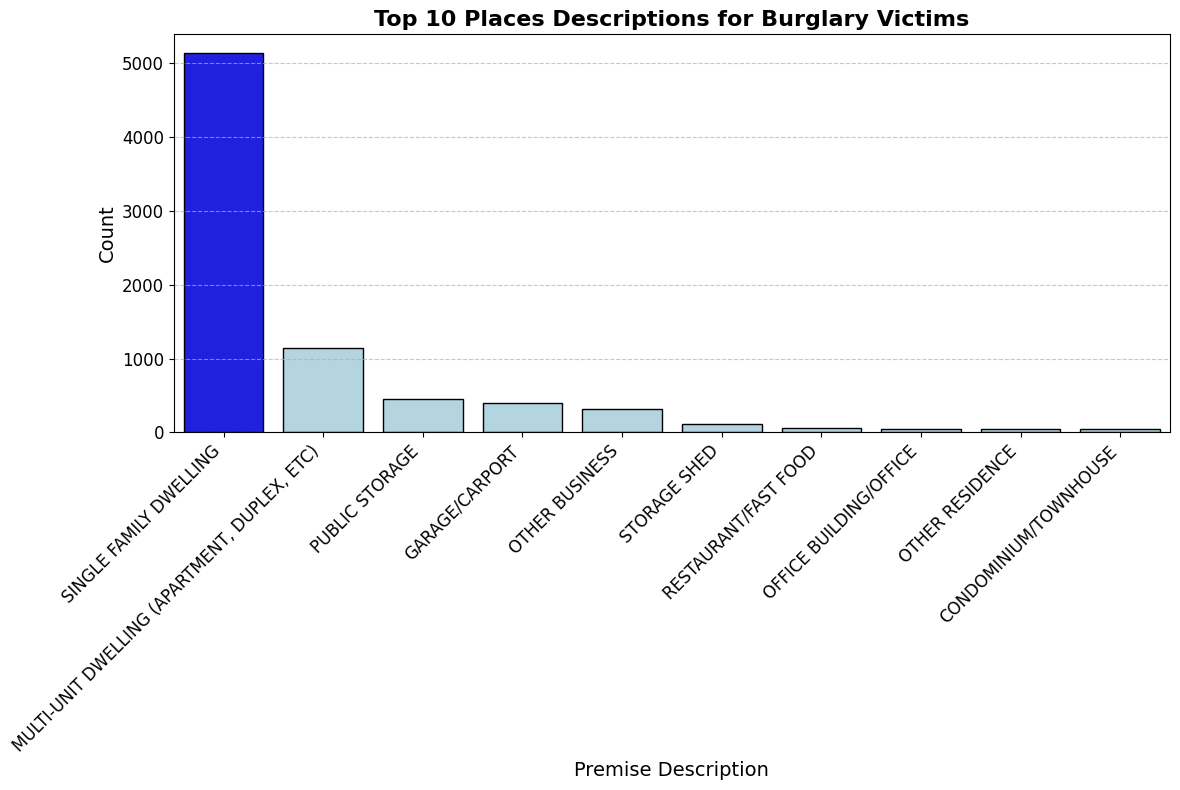

In [9]:
old_burglary_df = old_df[old_df["crime_description"] == "BURGLARY"]


premise_description_counts = old_burglary_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']


top_10_premise_descriptions = premise_description_counts.head(10)

plt.figure(figsize=(12, 8))


colors = ['lightblue' if count != top_10_premise_descriptions['count'].max() else 'blue' for count in top_10_premise_descriptions['count']]


sns.barplot(x='premise_description', y='count', data=top_10_premise_descriptions, palette=colors, edgecolor='black')


plt.xlabel('Premise Description', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 10 Places Descriptions for Burglary Victims', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

על פי הגרף נראה שרוב אכלוסיית הזקנים שנפגעת מפריצות,מדווחת על פריצות לביתהם. אם זאת ניתן לראות שקיימות גם פריצות לעסקים בתדירות נמוכה

##### נבדוק האם המשטרה מצליחה להקטין את הפריצות נגד האוכלוסייה המבוגרת 

In [10]:
old_burglary_df['year_occurred'] = old_burglary_df['date_occurred'].dt.year
yearly_counts_old_burglary_df = old_burglary_df['year_occurred'].value_counts().reset_index()
yearly_counts_old_burglary_df.columns = ['year', 'amount_burglaries']
yearly_counts_old_burglary_df


C:\Users\Win10\AppData\Local\Temp\ipykernel_8252\3942132489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_burglary_df['year_occurred'] = old_burglary_df['date_occurred'].dt.year


,year,amount_burglaries
0,2023,2393
1,2022,2271
2,2021,1899
3,2020,1863


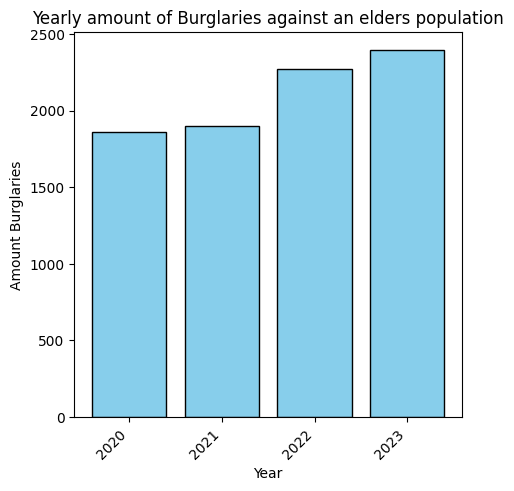

In [10]:
yearly_counts_old_burglary_df['year'] = yearly_counts_old_burglary_df['year'].astype(int)

plt.figure(figsize=(5, 5))
bars = plt.bar(yearly_counts_old_burglary_df['year'], yearly_counts_old_burglary_df['amount_burglaries'], color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Amount Burglaries')
plt.title('Yearly amount of Burglaries against an elders population')
plt.xticks(yearly_counts_old_burglary_df['year'], rotation=45, ha='right')
plt.show()

על פי הגרף ניתן להבחין במגמת עלייה מדאיגה בנושא פריצות נגד האוכלוסייה המבוגרת

##### ננסה להבין כמה פושעים שביצעו פריצות לנכנסים של אנשים מהאוכלוסייה המבוגרת נענשים

In [11]:
status_description_counts = old_burglary_df['status_description'].value_counts().reset_index()
status_description_counts.columns = ['status_description', 'count']
status_description_counts

,status_description,count
0,Invest Cont,7716
1,Adult Arrest,521
2,Adult Other,185
3,Juv Arrest,4


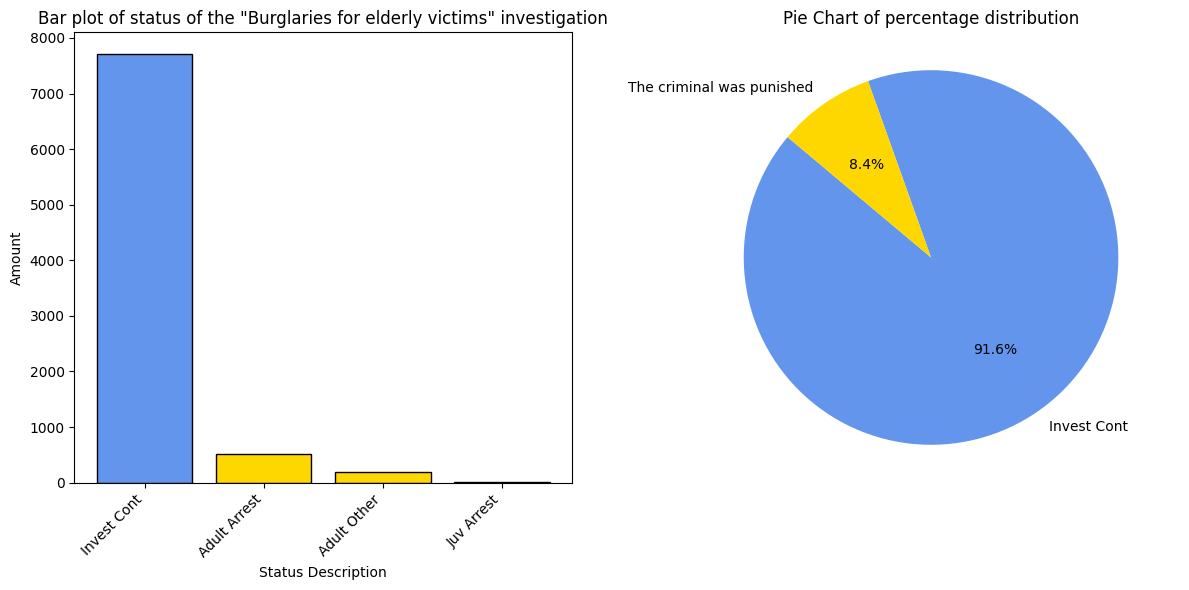

In [12]:
invest_cont_count = status_description_counts[status_description_counts['status_description'] == "Invest Cont"]['count'].sum()
other_count = status_description_counts['count'].sum() - invest_cont_count

status_description_simplified = pd.DataFrame({
    'status_description': ['Invest Cont', 'The criminal was punished'],
    'count': [invest_cont_count, other_count]
})


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
colors = ["#6495ED", "#FFD700"]
plt.pie(status_description_simplified['count'], labels=status_description_simplified['status_description'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Pie Chart of percentage distribution')
plt.axis('equal')


plt.subplot(1, 2, 1)
colors = ['#6495ED' if count == status_description_counts['count'].max() else '#FFD700' for count in status_description_counts['count']]
plt.bar(status_description_counts['status_description'], status_description_counts['count'], color=colors, edgecolor='black')
plt.xlabel('Status Description')
plt.ylabel('Amount')
plt.title('Bar plot of status of the "Burglaries for elderly victims" investigation')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

ניתן לראות על פי הגרפים שב91.6 אחוז מהמקרים בהם האוכלוסייה הזקנה מדווחת על פריצה, החקירה נמצאת במצב פתוח, משמע רוב הפורצים לא נעצרים. מבחינה כמותית מתוך 8426 מקרים בהם פרצו לבתים ועסקים של אנשים מעל גיל 60 כ7716 מקרים עדיין מוגדרים כמקרים פתוחים

##### נבדוק האם יש מגמת עלייה או ירידה ביחס הפושעים שנענשו במהלך השנים

In [13]:
status_description_yearly_counts = old_burglary_df.groupby(['year_occurred', 'status_description']).size().reset_index(name='count')


pivot_table = status_description_yearly_counts.pivot(index='year_occurred', columns='status_description', values='count').fillna(0)


pivot_table

status_description,Adult Arrest,Adult Other,Invest Cont,Juv Arrest
year_occurred,,,,
2020,147.0,69.0,1646.0,1.0
2021,146.0,38.0,1715.0,0.0
2022,132.0,45.0,2092.0,2.0
2023,96.0,33.0,2263.0,1.0


In [19]:
required_columns = ['Adult Arrest', 'Adult Other', 'Juv Arrest']
for col in required_columns:
    if col not in pivot_table.columns:
        pivot_table[col] = 0


result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)

result_df.columns = ['Year', 'Invest Cont', 'criminals_punished']
result_df

,Year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


In [20]:
result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)
result_df.columns = ['year', 'Invest Cont', 'criminals_punished']
result_df

,year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


In [22]:
result_subset = result_df[['criminals_punished', 'year']]
yearly_counts_subset = yearly_counts_old_burglary_df[['amount_burglaries', 'year']]


final_df = pd.merge(result_subset, yearly_counts_subset, on='year')


final_df = final_df[['year', 'amount_burglaries', 'criminals_punished']]
final_df


,year,amount_burglaries,criminals_punished
0,2020,1863,217.0
1,2021,1899,184.0
2,2022,2271,179.0
3,2023,2393,130.0


##### נבדוק את הקורלציה בין עליית כמות הפריצות עם כמות ירידת הפורצים שנתפסו בשנים האחרונות

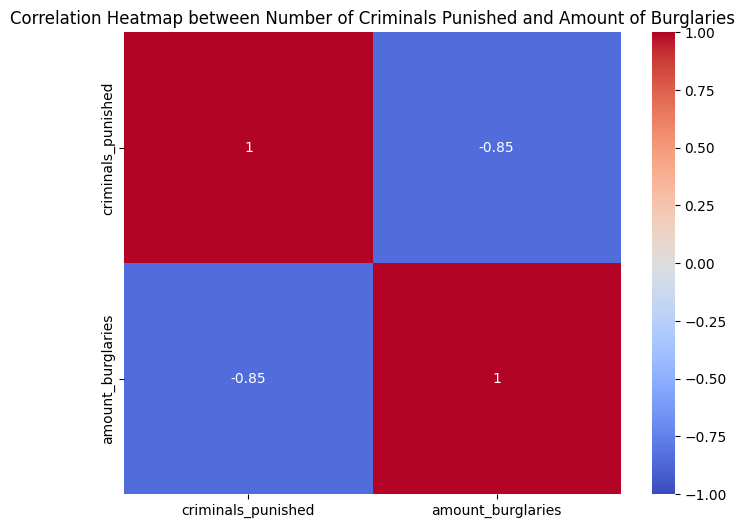

,criminals_punished,amount_burglaries
criminals_punished,1.00000,-0.85139
amount_burglaries,-0.85139,1.00000


In [23]:
correlation_data = final_df[['criminals_punished', 'amount_burglaries']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Number of Criminals Punished and Amount of Burglaries')
plt.show()


correlation_matrix




בהתאם לנתוני הקורלציה, ניתן להסיק כי קיימת מגמה לפיה ככל שמספר העבריינים שנענשים הולך ודועך, כך מספר הפריצות הולך ועולה. קשר זה, שמוערך ב-0.85-, מצביע על קשר שלילי חזק בין שני המקרים

<Figure size 1000x600 with 0 Axes>

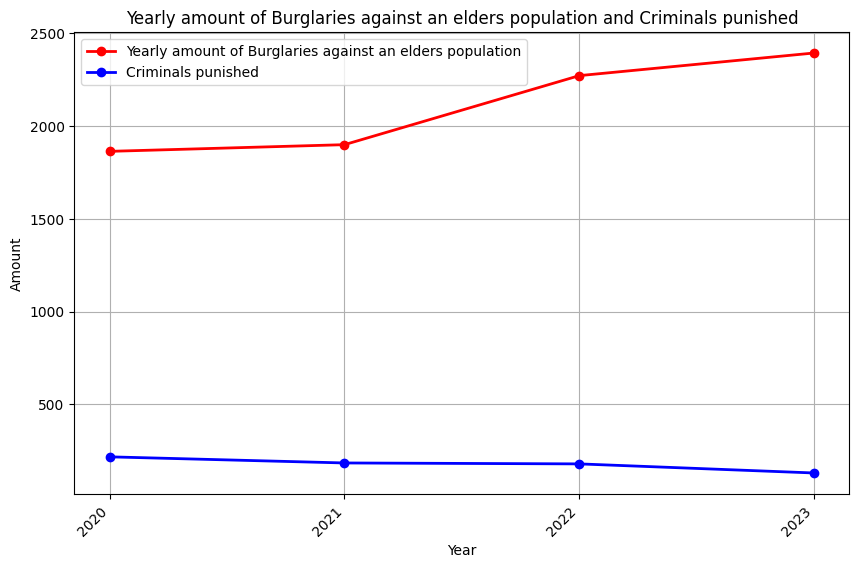

In [24]:
final_df['year'] = final_df['year'].astype(int)
result_df['year'] = result_df['year'].astype(int)
plt.figure(figsize=(10, 6))


plt.figure(figsize=(10, 6))

plt.plot(final_df["year"], final_df['amount_burglaries'], color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Yearly amount of Burglaries against an elders population')

plt.plot(result_df["year"], result_df['criminals_punished'], color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Criminals punished')

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Yearly amount of Burglaries against an elders population and Criminals punished')
plt.xticks(final_df['year'], rotation=45, ha='right')
plt.grid(True)
plt.legend()

plt.show()

#### מסקנה 3 

על פי החקירה שחברי הצוות עשו בנושא "פריצות לנכסים של האוכלוסייה המבוגרת" לראות כי בשנים האחרונות חלה עלייה בכמות עבירות הפריצה שנעשות נגד אנשים בני 60 ומעלה,
ומנגד חלה ירידה בכמות הפושעים שנענשו על העבירה. הנתונים הללו שמרבית הפורצים לא נענשים מצבעים על מגמת ירידה של המשטרה בלוס אנג'לס בנושא הזה, מה שנותן לפורצים לגטימציה  להמשיך ולבצע פריצות לנכנסים של האוכלוסייה המבוגרת. המשטרה בלוס אנג'לס חייבת לשים יותר דגש על לכידת פורצים שפורצים לנכנסים של אוכלוסיית האנשים מגיל 60 ומעלה
מכייון שעל פי הקורלציה השלילית החזקה שיש בין המקרים, ככל שכמות  העונשים לפורצים שפרצו לנכנסים של אנשים מגיל 60 ומעלה תגדל, כך תגדל גם כמות הפריצות נגד אותה אוכלוסייה תקטן , ולכן חובת המשטרה היא לעצור את כמה שיותר פורצים כאלו על מנת לתת הרתעה לפורצים, ולתת תחושת ביטחון לאוכלוסייה המבוגרת

### קוד כדי לדעת באיזה נושאים יש עלייה משנה לשנה

In [ ]:
old_df['date_occurred'] = pd.to_datetime(old_df['date_occurred'])

# Extract the year from the date_occurred column
old_df['year_occurred'] = old_df['date_occurred'].dt.year

# Count the occurrences for each crime description by year
crime_year_counts = old_df.groupby(['crime_description', 'year_occurred']).size().unstack(fill_value=0)

# Filter the crime descriptions that have an increasing count each year
increasing_crimes = crime_year_counts[
    (crime_year_counts[2020] < crime_year_counts[2021]) & 
    (crime_year_counts[2021] < crime_year_counts[2022]) & 
    (crime_year_counts[2022] < crime_year_counts[2023])
].index.tolist()

# Display the increasing crimes
increasing_crimes

### שימוש בנשקים 

In [14]:
weapon_category_counts = df['weapon_category'].value_counts().reset_index()

weapon_category_counts.columns = ['weapon_category', 'count']

weapon_category_counts



,weapon_category,count
0,no weapon used,556202
1,Physical strength,159843
2,firearm,42089
3,Unknown Weapon,31728
4,threats,21830
5,sharp weapon,20966
6,improvised weapon,16682
7,vehicles,2979
8,fire and bombs,631


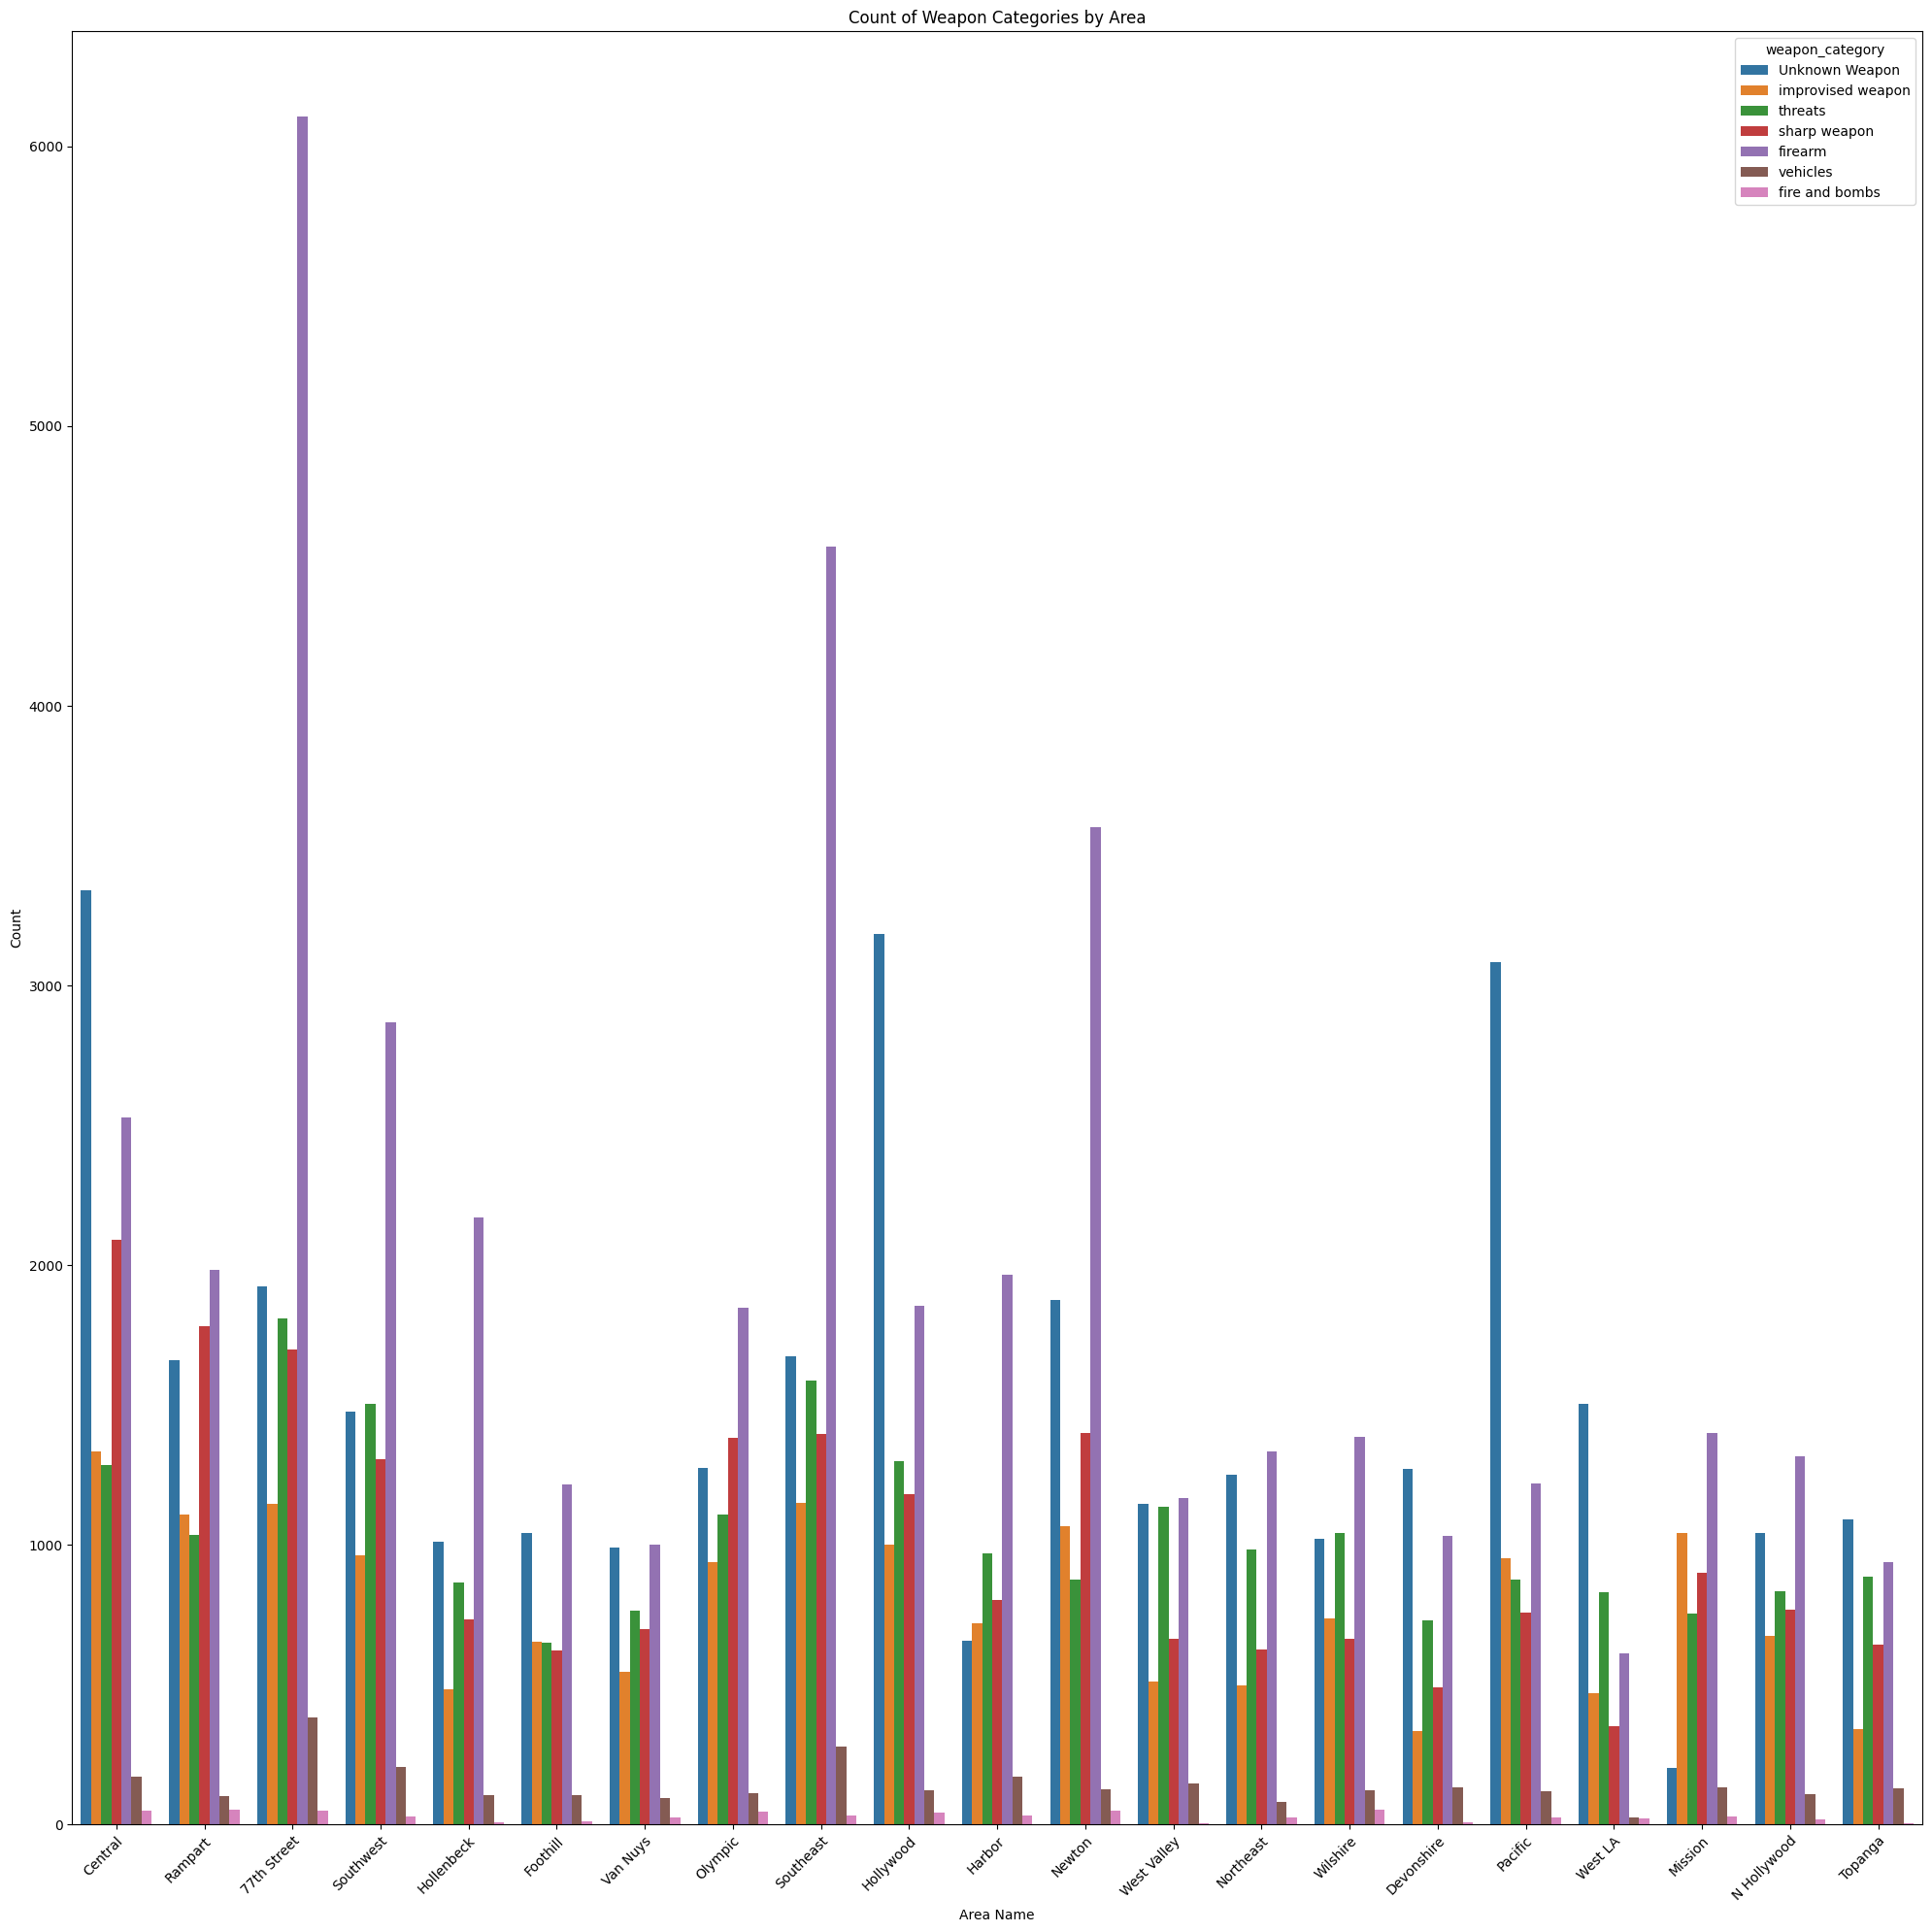

In [16]:
firearm_df = df[df['weapon_category'] == 'firearm']
firearm_area_counts = firearm_df['area_name'].value_counts().reset_index()
firearm_area_counts.columns = ['area_name', 'count']
firearm_area_counts

,area_name,count
0,77th Street,6106
1,Southeast,4570
2,Newton,3566
3,Southwest,2870
4,Central,2529
5,Hollenbeck,2171
6,Rampart,1984
7,Harbor,1967
8,Hollywood,1855
9,Olympic,1847
